## Define imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

COLORS_1 = ["#FA5858", "#64FE2E"]

## Function : Load Dataset

In [102]:
def load_dataset():
    FILE_PATH = r'C:/Users/dhara/OneDrive/Documents/JPMC ML Training/bank-full.csv'
    return pd.read_csv(FILE_PATH,sep=';')

df = load_dataset()

## Data clean up

In [103]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

## Let's visualize full population relative to term subscriptions

<AxesSubplot:ylabel='y'>

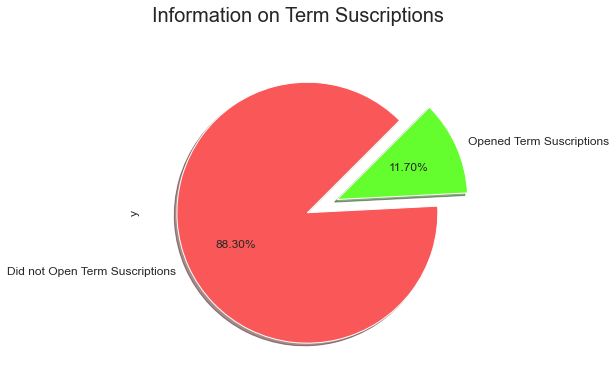

In [104]:
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df['y'].value_counts().plot.pie(explode=[0,0.25], startangle=45, autopct='%1.2f%%', shadow=True, colors=COLORS_1, labels=labels, fontsize=12)

## Let's plot term subscriptions by job categories

<Figure size 720x432 with 0 Axes>

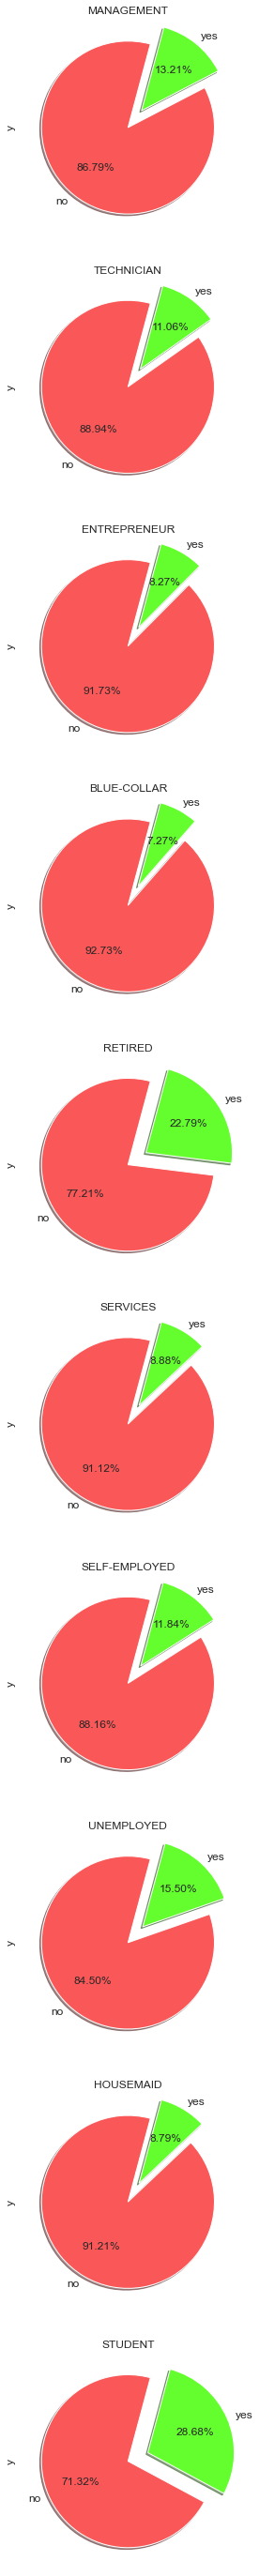

In [105]:
job_categories = df['job'].unique().tolist()

labels ="Didn't Show Interest", "Shown Interest"
plt.suptitle('Information on Term Suscriptions (Job Categories)', fontsize=20)

f, axs = plt.subplots(len(job_categories), 1, figsize=(80,50))

for job, ax in zip(df['job'].unique().tolist(), axs.ravel()):
    
    # chart formatting
    ax.set_title(job.upper())

    pdf = df[df.job == job]
    pdf['y'].value_counts().plot.pie(explode=[0,0.25], startangle=75, autopct='%1.2f%%', shadow=True, colors=colors, fontsize=12, ax=ax)

plt.show()

## Let's analyze education vs balance relative to  term subscription

[Text(0, 0, 'tertiary'),
 Text(1, 0, 'secondary'),
 Text(2, 0, 'unknown'),
 Text(3, 0, 'primary')]

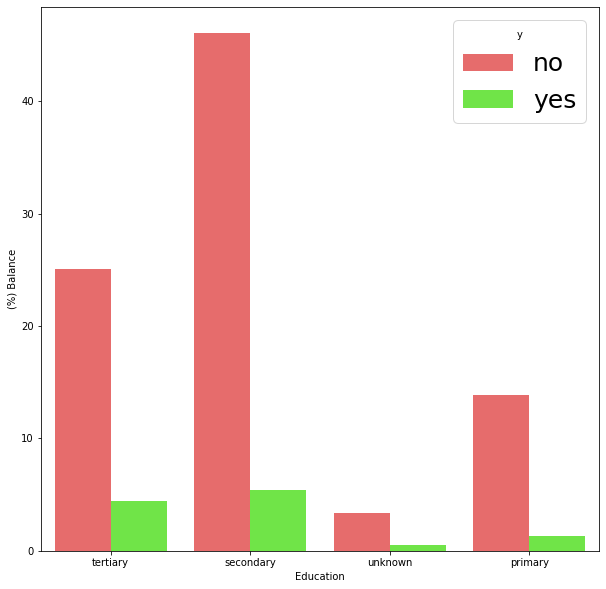

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="education", y="balance", hue="y", data=df, palette=COLORS_1, estimator=lambda x: len(x) / len(df) * 100,ax=ax)
ax.set(ylabel="(%) Balance", xlabel="Education")
ax.set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")

## Let's analyze (education + marital) on (age vs balance) relative to term subscription

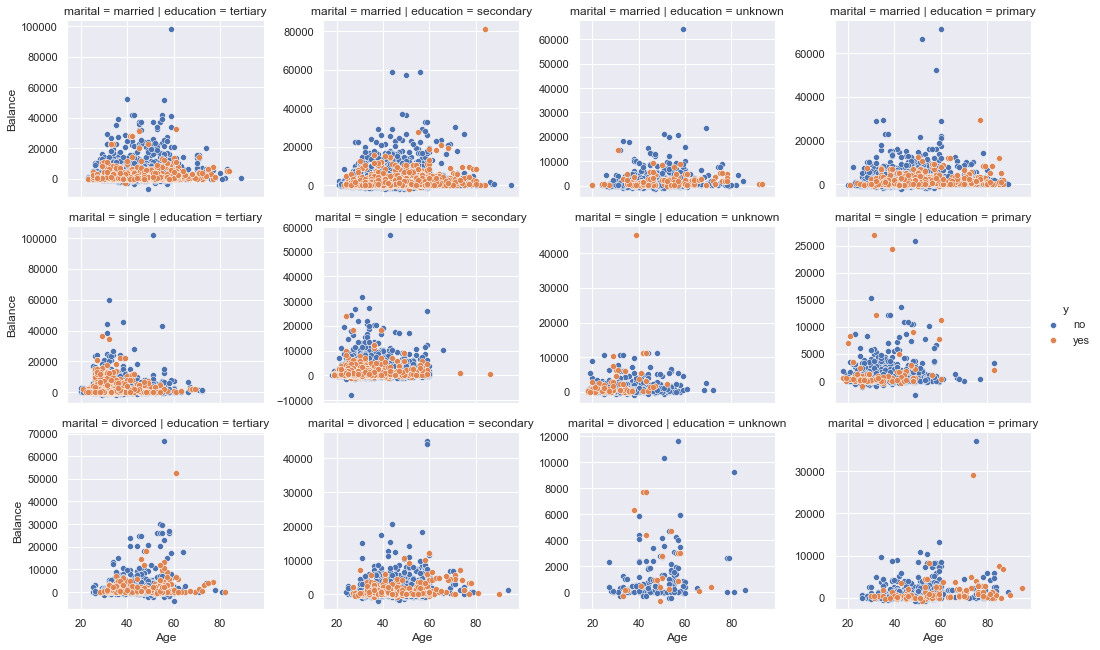

In [106]:
g1 = sns.FacetGrid(df, col='education', row='marital', sharey=False, hue='y', height=3, aspect=1.2, legend_out = True)
g1.map_dataframe(sns.scatterplot, x="age", y="balance")
g1.set_axis_labels('Age','Balance')
g1.add_legend()

## Let's analyze month/seasonality relative to term subscription

<AxesSubplot:xlabel='month', ylabel='count'>

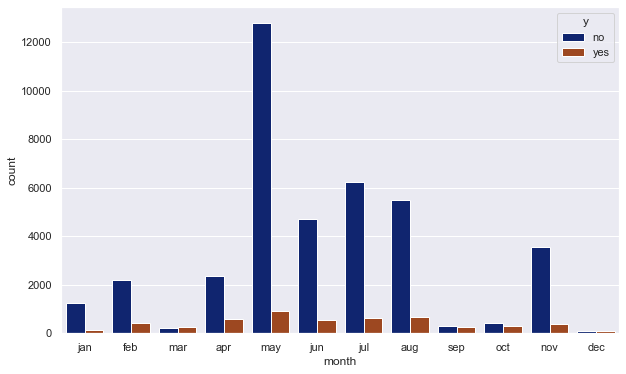

In [107]:
sns.set(rc={"figure.figsize":(10, 6)}) #width=8, height=4
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month',data=df, order=month_order, hue='y',palette='dark' )

## Let's analyze correlation amonst (loan (personal/housing), default, term subscription)

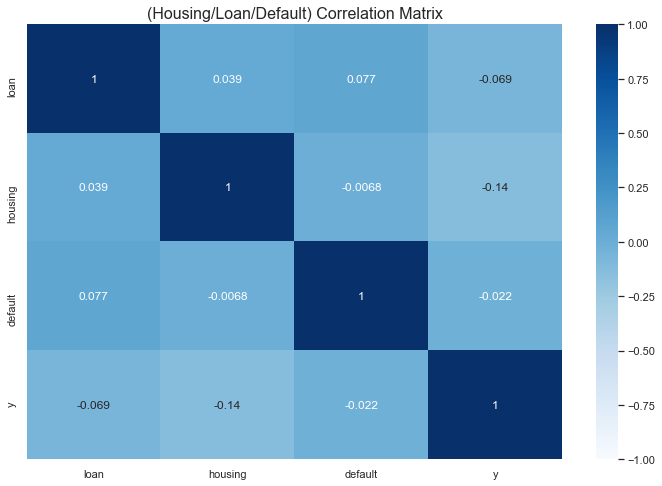

In [108]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
new_df = df.copy()

# Let's encode categorical values
new_df['y'] = LabelEncoder().fit_transform(new_df['y'])
new_df['loan'] = LabelEncoder().fit_transform(new_df['loan'])
new_df['housing'] = LabelEncoder().fit_transform(new_df['housing'])
new_df['default'] = LabelEncoder().fit_transform(new_df['default'])

ndf = new_df[['loan','housing','default','y']]
corr_numeric = ndf.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="Blues", annot=True, vmin=-1, vmax=1)
plt.title("(Housing/Loan/Default) Correlation Matrix", fontsize=16)
plt.show()

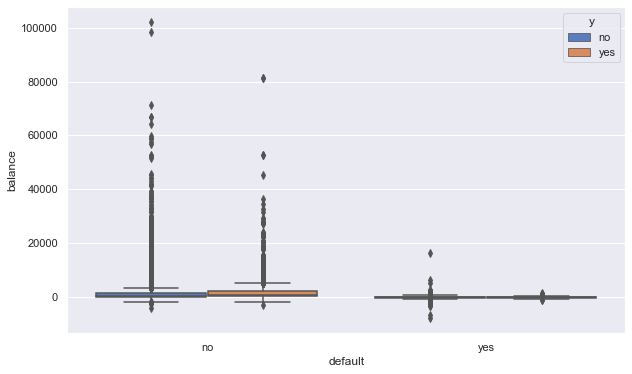

In [116]:
g = sns.boxplot(x="default", y="balance", hue="y",
                    data=df, palette="muted")